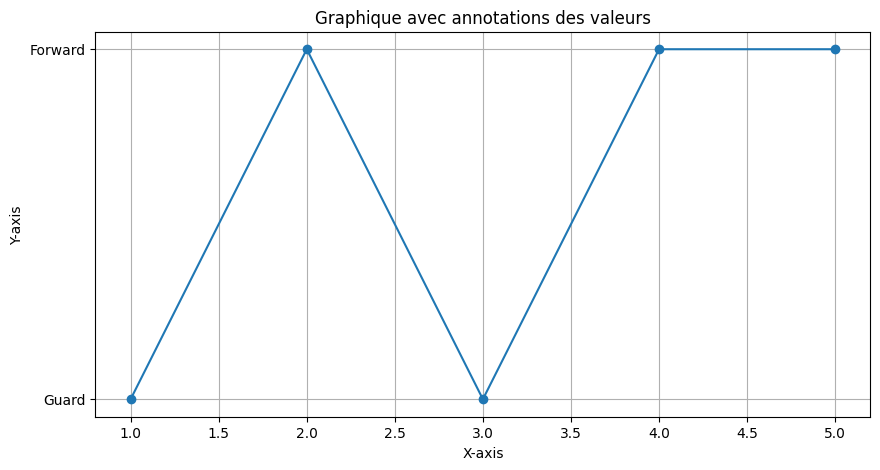

In [4]:
import matplotlib.pyplot as plt

# Données d'exemple
x = [1, 2, 3, 4, 5]
y = ['Guard', 'Forward', 'Guard', 'Forward', 'Forward']

# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-')

# # Ajout des annotations pour chaque point de données
# for i in range(len(x)):
#     plt.text(x[i], y[i], str(y[i]), fontsize=12, ha='center', va='bottom')

# Ajout de titres et labels
plt.title('Graphique avec annotations des valeurs')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Affichage du graphique
plt.grid(True)
plt.show()

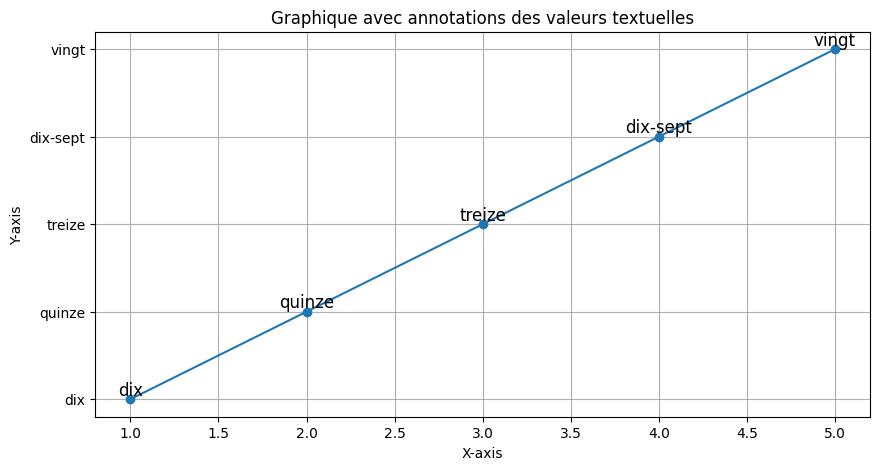

In [5]:
x = [1, 2, 3, 4, 5]
y = ['dix', 'quinze', 'treize', 'dix-sept', 'vingt']

# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-')

# Ajout des annotations pour chaque point de données
for i in range(len(x)):
    plt.text(x[i], y[i], y[i], fontsize=12, ha='center', va='bottom')

# Ajout de titres et labels
plt.title('Graphique avec annotations des valeurs textuelles')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Affichage du graphique
plt.grid(True)
plt.show()

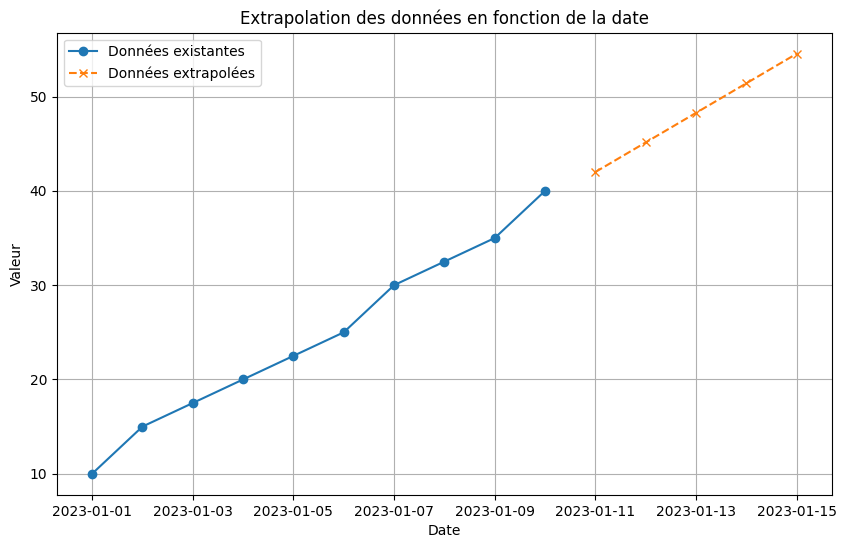

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Création d'un DataFrame d'exemple avec des dates et des valeurs
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, np.nan, 20, np.nan, 25, 30, np.nan, 35, 40]
}

df = pd.DataFrame(data)

# Remplir les valeurs manquantes par interpolation linéaire
df['value'] = df['value'].interpolate()

# Convertir les dates en nombres pour la régression
df['date_num'] = pd.to_numeric(df['date'])

# Ajuster une régression linéaire aux données existantes
coefficients = np.polyfit(df['date_num'], df['value'], 1)
poly = np.poly1d(coefficients)

# Définir une plage de dates pour extrapoler
future_dates = pd.date_range(start=df['date'].iloc[-1] + timedelta(days=1), periods=5, freq='D')
future_dates_num = pd.to_numeric(future_dates)

# Extrapoler les valeurs futures
future_values = poly(future_dates_num)

# Créer un DataFrame pour les dates futures
future_df = pd.DataFrame({'date': future_dates, 'value': future_values})

# Combiner les données existantes et extrapolées
combined_df = pd.concat([df[['date', 'value']], future_df])

# Tracer les données
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'], label='Données existantes', marker='o')
plt.plot(future_df['date'], future_df['value'], label='Données extrapolées', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Extrapolation des données en fonction de la date')
plt.legend()
plt.grid(True)
plt.show()


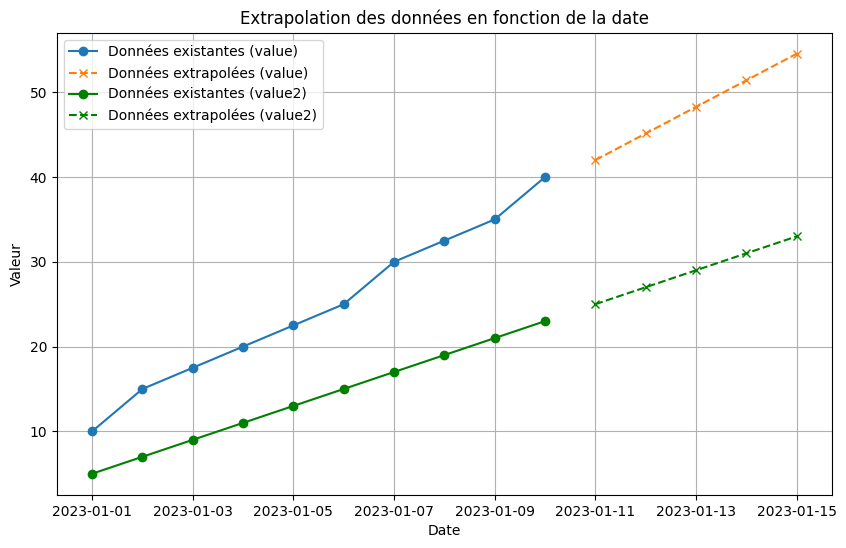

        date      value  value2 category
0 2023-01-01  10.000000     5.0        A
1 2023-01-02  15.000000     7.0        B
2 2023-01-03  17.500000     9.0        A
3 2023-01-04  20.000000    11.0        B
4 2023-01-05  22.500000    13.0        A
5 2023-01-06  25.000000    15.0        B
6 2023-01-07  30.000000    17.0        A
7 2023-01-08  32.500000    19.0        B
8 2023-01-09  35.000000    21.0        A
9 2023-01-10  40.000000    23.0        B
0 2023-01-11  42.000000    25.0        A
1 2023-01-12  45.136364    27.0        B
2 2023-01-13  48.272727    29.0        A
3 2023-01-14  51.409091    31.0        B
4 2023-01-15  54.545455    33.0        A


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Création d'un DataFrame d'exemple avec des dates et des valeurs
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, np.nan, 20, np.nan, 25, 30, np.nan, 35, 40],
    'value2': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
    'category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}

df = pd.DataFrame(data)

# Remplir les valeurs manquantes par interpolation linéaire
df['value'] = df['value'].interpolate()

# Convertir les dates en nombres pour la régression
df['date_num'] = pd.to_numeric(df['date'])

# Ajuster une régression linéaire aux données existantes
coefficients = np.polyfit(df['date_num'], df['value'], 1)
poly = np.poly1d(coefficients)

# Définir une plage de dates pour extrapoler
future_dates = pd.date_range(start=df['date'].iloc[-1] + timedelta(days=1), periods=5, freq='D')
future_dates_num = pd.to_numeric(future_dates)

# Extrapoler les valeurs futures pour 'value' et 'value2'
future_values = poly(future_dates_num)
future_values2 = np.linspace(df['value2'].iloc[-1] + 2, df['value2'].iloc[-1] + 2 * 5, 5)

# Créer des catégories futures basées sur une alternance
future_categories = ['A' if i % 2 == 0 else 'B' for i in range(len(future_dates))]

# Créer un DataFrame pour les dates futures
future_df = pd.DataFrame({
    'date': future_dates,
    'value': future_values,
    'value2': future_values2,
    'category': future_categories
})

# Combiner les données existantes et extrapolées
combined_df = pd.concat([df[['date', 'value', 'value2', 'category']], future_df])

# Tracer les données
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'], label='Données existantes (value)', marker='o')
plt.plot(future_df['date'], future_df['value'], label='Données extrapolées (value)', linestyle='--', marker='x')
plt.plot(df['date'], df['value2'], label='Données existantes (value2)', marker='o', color='green')
plt.plot(future_df['date'], future_df['value2'], label='Données extrapolées (value2)', linestyle='--', marker='x', color='green')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Extrapolation des données en fonction de la date')
plt.legend()
plt.grid(True)
plt.show()

print(combined_df)


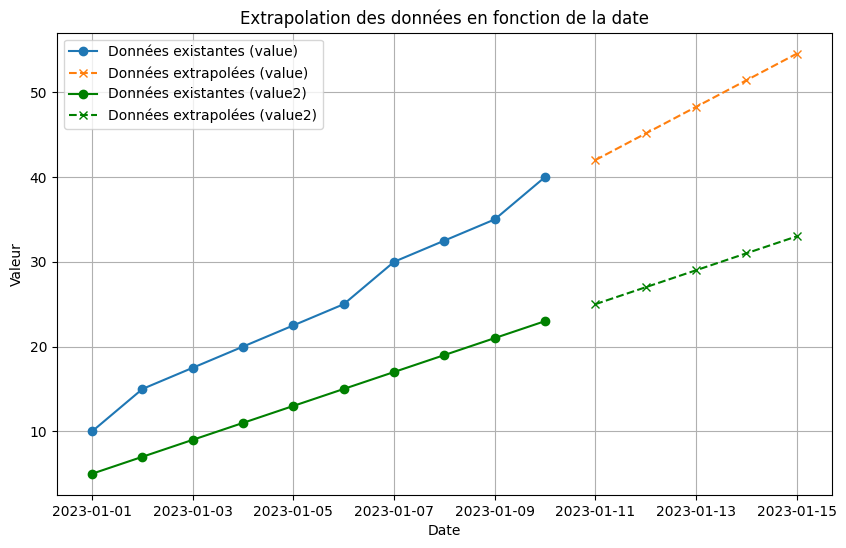

        date      value  value2 category
0 2023-01-01  10.000000     5.0        A
1 2023-01-02  15.000000     7.0        B
2 2023-01-03  17.500000     9.0        A
3 2023-01-04  20.000000    11.0        B
4 2023-01-05  22.500000    13.0        A
5 2023-01-06  25.000000    15.0        B
6 2023-01-07  30.000000    17.0        A
7 2023-01-08  32.500000    19.0        B
8 2023-01-09  35.000000    21.0        A
9 2023-01-10  40.000000    23.0        B
0 2023-01-11  42.000000    25.0        A
1 2023-01-12  45.136364    27.0        B
2 2023-01-13  48.272727    29.0        A
3 2023-01-14  51.409091    31.0        B
4 2023-01-15  54.545455    33.0        A


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.linear_model import LinearRegression

# Création d'un DataFrame d'exemple avec des dates et des valeurs
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': [10, 15, np.nan, 20, np.nan, 25, 30, np.nan, 35, 40],
    'value2': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
    'category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}

df = pd.DataFrame(data)

# Remplir les valeurs manquantes par interpolation linéaire
df['value'] = df['value'].interpolate()

# Convertir les dates en nombres pour la régression
df['date_num'] = pd.to_numeric(df['date'])

# Préparer les données pour la régression multivariée
X = df[['date_num', 'value2']]
y = df['value']

# Ajuster une régression linéaire multivariée aux données existantes
model = LinearRegression()
model.fit(X, y)

# Définir une plage de dates pour extrapoler
future_dates = pd.date_range(start=df['date'].iloc[-1] + timedelta(days=1), periods=5, freq='D')
future_dates_num = pd.to_numeric(future_dates)

# Créer des valeurs futures pour 'value2' en les augmentant linéairement
future_values2 = np.linspace(df['value2'].iloc[-1] + 2, df['value2'].iloc[-1] + 2 * 5, 5)

# Préparer les données futures pour la prédiction
future_X = pd.DataFrame({
    'date_num': future_dates_num,
    'value2': future_values2
})

# Extrapoler les valeurs futures en utilisant le modèle ajusté
future_values = model.predict(future_X)

# Créer des catégories futures basées sur une alternance
future_categories = ['A' if i % 2 == 0 else 'B' for i in range(len(future_dates))]

# Créer un DataFrame pour les dates futures
future_df = pd.DataFrame({
    'date': future_dates,
    'value': future_values,
    'value2': future_values2,
    'category': future_categories
})

# Combiner les données existantes et extrapolées
combined_df = pd.concat([df[['date', 'value', 'value2', 'category']], future_df])

# Tracer les données
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['value'], label='Données existantes (value)', marker='o')
plt.plot(future_df['date'], future_df['value'], label='Données extrapolées (value)', linestyle='--', marker='x')
plt.plot(df['date'], df['value2'], label='Données existantes (value2)', marker='o', color='green')
plt.plot(future_df['date'], future_df['value2'], label='Données extrapolées (value2)', linestyle='--', marker='x', color='green')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Extrapolation des données en fonction de la date')
plt.legend()
plt.grid(True)
plt.show()

print(combined_df)
